# TP2 ADM : Analyse de données (ACP) avec Python
### GHAZEL Hassen, HALVICK Thomas
### Polytech Lyon | 4A Info

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### *Question 1*

In [8]:
# Importation du fichier CSV
data = pd.read_csv("./data/villes.csv", sep=';')
# Valeurs
X = data.iloc[:, 1:13].values
# Nom des villes
labels = data.iloc[:, 0].values

print(X,labels)

[[ 7.7  8.7 10.5 12.6 15.9 19.8 22.  22.2 20.3 16.3 11.8  8.7]
 [ 4.2  4.9  7.9 10.4 13.6 17.  18.7 18.4 16.1 11.7  7.6  4.9]
 [ 4.6  5.4  8.9 11.3 14.5 17.2 19.5 19.4 16.9 12.5  8.1  5.3]
 [ 1.1  2.2  6.4  9.7 13.6 16.9 18.7 18.3 15.5 10.4  5.7  2. ]
 [ 7.6  8.  10.8 12.  14.7 17.8 19.7 19.9 18.5 14.8 10.9  8.2]
 [ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.3  2.6  6.9 10.4 14.3 17.7 19.6 19.  15.9 10.5  5.7  2.1]
 [ 0.5  1.6  5.7  9.  13.  16.4 18.9 18.3 15.3 10.1  4.6  0.5]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 3.1  3.9  7.4  9.9 13.3 16.8 18.4 17.8 15.3 10.7  6.7  3.8]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.

### *Question 2*

#### *a)*

In [18]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

cumulative_variances = np.cumsum(pca.explained_variance_ratio_)

percent = 0.9
n_components = np.argmax(cumulative_variances >= percent) + 1
print("Nombres d'axes obtenus : ", n_components)

print(pca.components_[:n_components])

Nombres d'axes obtenus :  2
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


#### *b)*

Donner une interprétation des deux premiers axes principaux.
Le premier axe représente l'écart à la moyenne de la température pour chaque ville.

Le second axe représente l'écart à la moyenne pour les mois les plus froids (1 à 3 et 9 à 12).

#### *c)*

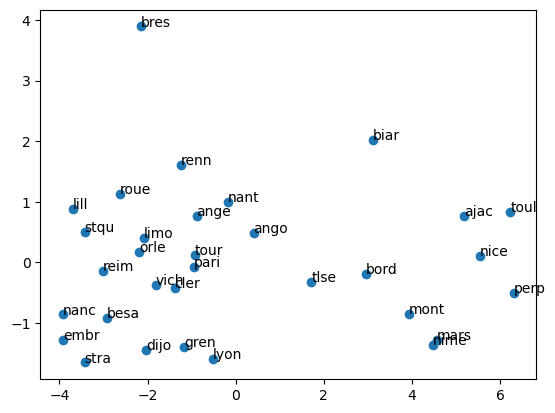

In [15]:
import matplotlib 
X_pca = pca.transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1]) 
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]): 
    plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show() 

#### *d)*

l'axe principale represente l'écart a la moyenne 

influence des saisons
negatif : plus froid en hiver et chaud été 
positif : plus chaud en hiver et froid en été

#### *e)*

In [ ]:
def fullAnalysisPCA(fichier):
    
    data = pd.read_csv("./data/villes.csv", sep=';')

    X = data.iloc[:, 1:13].values
    # Nom des villes
    labels = data.iloc[:, 0].values

    # On centre et on réduit les données
    ss = StandardScaler()
    ss.fit(X)
    X_scaled = ss.transform(X)

    # Analyse en Compsantes Principales
    pca = PCA()
    pca.fit(X_scaled)

    # Calcul des valeurs de variances
    vals_propres = pca.explained_variance_
    print("Valeurs propres : ", vals_propres)
    # Somme cumulative des ratios (valeur propre)/(somme des valeurs propres)
    cumulative_variances = np.cumsum(pca.explained_variance_ratio_)
    print("Somme des deux premières valeurs propres : ", np.sum(pca.explained_variance_ratio_[:2]))
    print("Somme des trois premières valeurs propres : ", np.sum(pca.explained_variance_ratio_[:3]))

    # On prend les colonnes dont la somme cumulative dépasse le pourcentage souhaité
    percent = 0.9
    n_components = np.argmax(cumulative_variances >= percent) + 1
    print("Nombres d'axes obtenus : ", n_components)
    
    print("Participation à la génération des 2 premiers axes prinicpaux :")
    print(pca.components_[:2])
    
    # Transformer la matrice de données selon les axes obtenus
    X_pca = pca.transform(X_scaled)
    
    # Affichage du graphique selon les 2 axes principaux
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.suptitle("Visualisation graphique des données selon les 2 axes principaux")
    plt.show()